In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
paramspace <- read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv")

In [3]:
paramspace <- paramspace %>% select(pt_id, cfDNA_folder)

In [4]:
head(paramspace)

pt_id,cfDNA_folder
C04689,C303A04689D_cfdna_N295-103
C04689,C305A04689D_cfdna_N295-71
C04689,C309A04689D_cfdna_N295-47
C04689,C302A04689D_cfdna_N295-102
C04689,C299A04689D_cfdna_N295-99
C04689,C307A04689D_cfdna_N295-110


In [5]:
patients <- as.character(unique(paramspace$pt_id))

In [6]:
patients

[1] "C04689" "C04816" "C04837" "C04849" "C04873" "C04874" "C04886" "C04887"
 [9] "C05048" "C05073" "C05084" "C05118" "C05194" "C05234" "C05703"

In [7]:
read_counts <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(read_counts) <-c("pt_id", "cfDNA_sample", "readcount")

In [8]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/cs1e9/cfDNA_count.csv", sep = ""), header=FALSE)
        read_counts[nrow(read_counts)+1,] = c(i, j, reads)
    }}

## Combine the ratios for all patients in one data frame

In [9]:
big_ratio <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(big_ratio) <-c("pt_id", "cfDNA_sample", "big_ratio")

In [10]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/ci5_cs1e9/big_ratio_singletons_excluded_tumor_4_cs.csv", sep = ""))
        reads <- reads %>% select(ratio)
        big_ratio[nrow(big_ratio)+1,] = c(i, j, reads)
    }}

In [11]:
small_ratio <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(small_ratio) <-c("pt_id", "cfDNA_sample", "small_ratio")

In [12]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/ci5_cs1e9/small_ratio_singletons_excluded_tumor_4_cs.csv", sep = ""))
        reads <- reads %>% select(ratio)
        small_ratio[nrow(small_ratio)+1,] = c(i, j, reads)
    }}

## Plots

In [13]:
big_ratio <- big_ratio %>% select("cfDNA_sample", "big_ratio")

In [14]:
small_ratio <- small_ratio %>% select("cfDNA_sample", "small_ratio")

In [15]:
ratios_and_counts <- left_join(read_counts, big_ratio, by="cfDNA_sample")
ratios_and_counts <- left_join(ratios_and_counts, small_ratio, by="cfDNA_sample")

In [16]:
cor(ratios_and_counts$big_ratio, ratios_and_counts$readcount)

[1] 0.02739887

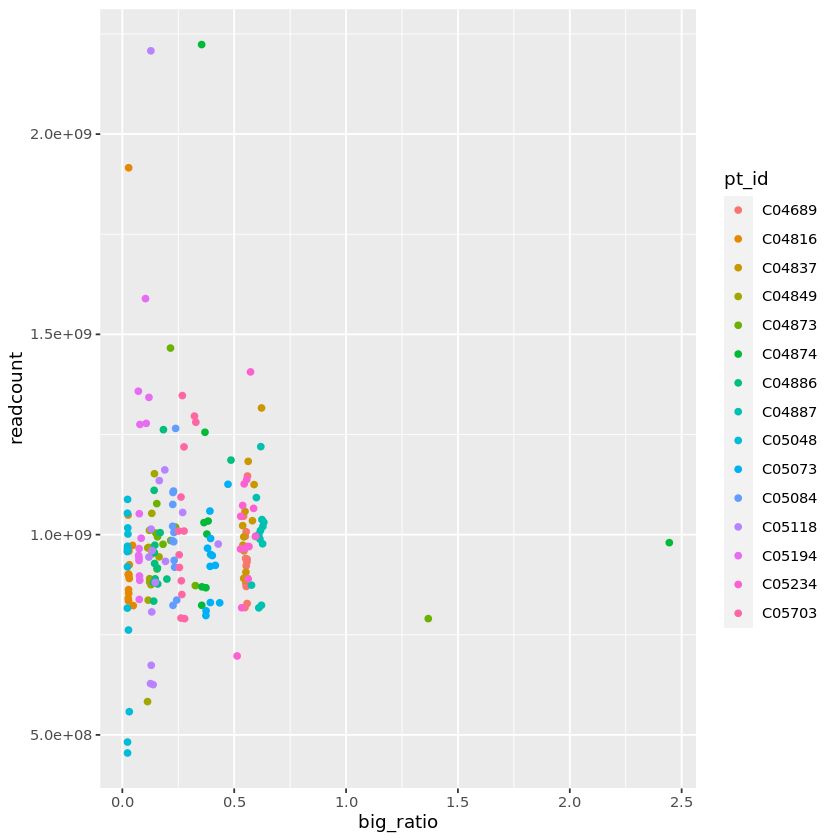

In [23]:
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = big_ratio, y = readcount, color = pt_id))

In [18]:
cor(ratios_and_counts$small_ratio, ratios_and_counts$readcount)

[1] 0.1493264

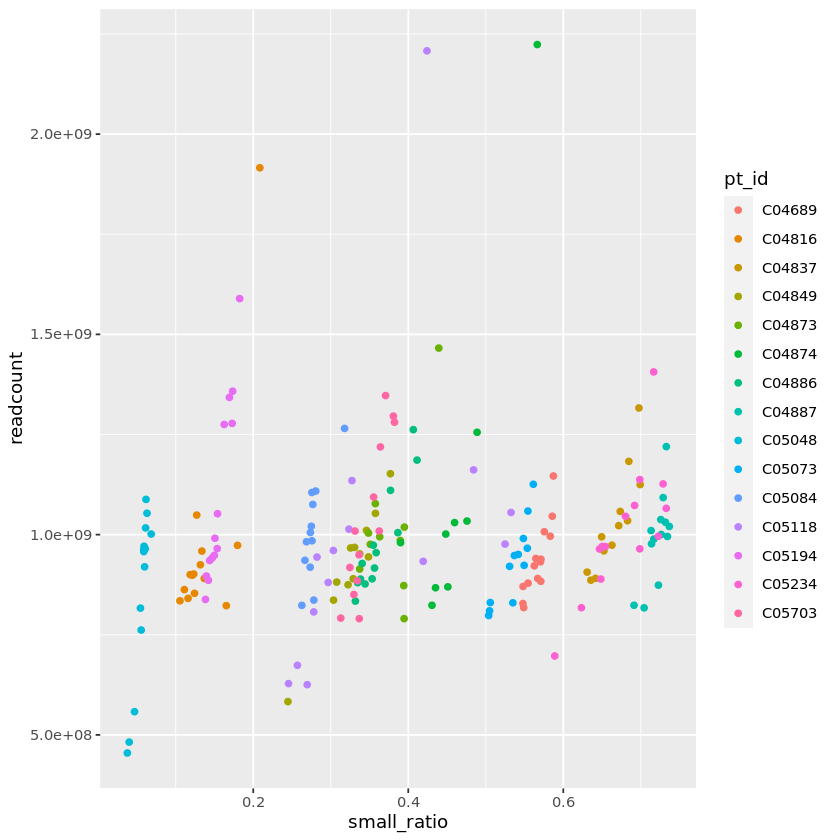

In [21]:
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = small_ratio, y = readcount, color = pt_id))

In [34]:
pt_correlation <- ratios_and_counts %>% group_by(pt_id)  %>% transmute(corr_big = cor(readcount, big_ratio), corr_small = cor(readcount, small_ratio)) %>% unique()

In [35]:
pt_correlation

pt_id,corr_big,corr_small
C04689,-0.09636379,0.8876929
C04816,-0.12668780,0.7428266
C04837,0.78152714,0.8835493
C04849,0.44655507,0.9691930
C04873,-0.43715945,0.5161696
C04874,-0.12643931,0.8794065
C04886,0.52357276,0.9335668
C04887,0.23414972,0.7244169
C05048,-0.36263754,0.9539017
C05073,0.50061385,0.8743399


In [20]:
ratios_and_counts

pt_id,cfDNA_sample,readcount,big_ratio,small_ratio
C04689,C303A04689D_cfdna_N295-103,827991065,0.55772918,0.5479398
C04689,C305A04689D_cfdna_N295-71,883469138,0.55856452,0.5709877
C04689,C309A04689D_cfdna_N295-47,817835199,0.54788937,0.5489249
C04689,C302A04689D_cfdna_N295-102,922155779,0.55366069,0.5626518
C04689,C299A04689D_cfdna_N295-99,932048828,0.55701744,0.5705301
C04689,C307A04689D_cfdna_N295-110,890590110,0.56087526,0.5669944
C04689,C300A04689D_cfdna_N295-100,1146394933,0.55942647,0.5872640
C04689,C306A04689D_cfdna_N295-90,938698170,0.55779538,0.5711616
C04689,C312A04689D_cfdna_N295-162,1007226108,0.55356499,0.5755166
C04689,C311A04689D_cfdna_N295-157,940465477,0.55100074,0.5646126
